In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = 'D:\\Data\\text_summarization\\'

In [3]:
df = pd.read_csv(data_path + 'hvg.csv')

In [4]:
df.head()

,datetime,title,summary,summary_len,content,content_len
0,2019-09-09T05:59:00.0000000+02:00,Wichmann Tamás a rákkal küzd,A 71 éves kenuvilágbajnok azt üzeni mindenkine...,101,Két évvel ezelőtt kezdett fájdogálni a gyomrom...,1260
1,2008-07-23T21:08:26.0000000+02:00,KPMG: kevesebb cégfelvásárlás és fúzió,A fúziók és vállalatfelvásárlások összértékéne...,289,Simonyi szerint érzékelhetően csökken az akviz...,2527
2,2012-03-06T08:43:00.0000000+01:00,Index: milliárdos EU-bírságot kaphat Budapest,"Összesen 1,8 milliárd forint uniós bírságot ka...",179,Az Európai Bizottság körülbelül 900-900 millió...,3736
3,2013-10-19T12:39:00.0000000+02:00,Fantomgól: az újrajátszásban bízik a Hoffenheim,"A péntek este ""fantomgóllal"" vereséget szenved...",180,A 70. percben Stefan Kiessling fejese - a tele...,825
4,2013-03-05T17:33:00.0000000+01:00,Óriási büntetést kapott az ittasan vezető dán ...,Csillagászati pénzbüntetést kapott Nicklas Ben...,211,"A sérüléssel bajlódó, 25 éves Juventus-csatár ...",621


In [5]:
text = ' '.join(df[:20000].content).replace('\n', ' ').lower()

In [6]:
from spacy.tokenizer import Tokenizer
from spacy.lang.hu import Hungarian
nlp = Hungarian()
tokenizer = Tokenizer(nlp.vocab)

In [7]:
doc = tokenizer(text)
doc[:100]

két évvel ezelőtt kezdett fájdogálni a gyomrom, nem akart elmúlni, végül a tömő utcai klinika rákkutató orvosaival konzultálva vettük fel a harcot az istenverte kórral – mondta el a bors nak wichmann tamás, hogyan kezdődött a küzdelme a rákkal. 2017 őszére kiderült, hogy a rák már komoly előnyben van: a vastagbélen túl ráment a májra és a tüdőre is. 2018 tavaszától kemoterápiás kezelést kap. "kis szerencsém, hogy nem a legnehezebb fajtát osztotta rám a sors, hanem a gyengébb változatot" – mondja a lapnak a kilencszeres világbajnok kenus, bár hozzáteszi, annak ellenére igyekszik tartani magát, hogy a szívizomzata komoly terhelést kapott

In [8]:
words = [token.text for token in doc if token.is_stop != True and token.is_punct != True]
words[:10]

['két',
 'évvel',
 'ezelőtt',
 'kezdett',
 'fájdogálni',
 'gyomrom,',
 'akart',
 'elmúlni,',
 'végül',
 'tömő']

In [9]:
from nltk.probability import FreqDist

fdist = FreqDist(words)
fdist.most_common(50)

[('magyar', 10477),
 ('két', 7754),
 ('is,', 6039),
 ('első', 5981),
 ('millió', 5489),
 ('milliárd', 5272),
 ('is.', 5139),
 ('ezer', 4983),
 ('európai', 4188),
 (' ', 4022),
 ('év', 3937),
 ('kormány', 3773),
 ('éves', 3729),
 ('amerikai', 3659),
 ('forint', 3563),
 ('százalékkal', 3441),
 ('három', 3371),
 ('volt,', 3321),
 ('korábban', 3217),
 ('tavaly', 2998),
 ('meg,', 2993),
 ('óta', 2987),
 ('alapján', 2901),
 ('nemzetközi', 2855),
 ('százalékos', 2822),
 ('nemzeti', 2670),
 ('cég', 2612),
 ('további', 2494),
 ('gazdasági', 2451),
 ('meg.', 2422),
 ('politikai', 2404),
 ('legnagyobb', 2397),
 ('című', 2388),
 ('ám', 2362),
 ('mintegy', 2350),
 ('ugyanakkor', 2341),
 ('adott', 2336),
 ('arra,', 2334),
 ('idén', 2277),
 ('ország', 2277),
 ('második', 2272),
 ('állami', 2223),
 ('ki,', 2191),
 ('"a', 2183),
 ('során', 2180),
 ('el,', 2160),
 ('korábbi', 2159),
 ('tette', 2142),
 ('elmúlt', 2099),
 ('jelenleg', 2047)]

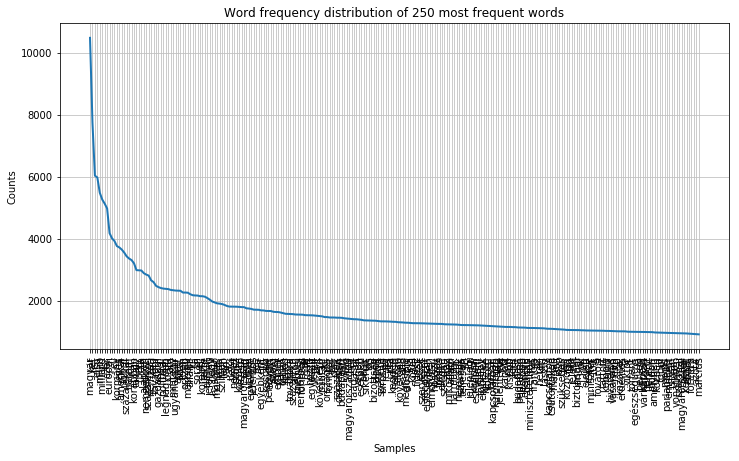

In [10]:
plt.figure(figsize=(12,6))
plt.title("Word frequency distribution of 250 most frequent words")
fdist.plot(250)

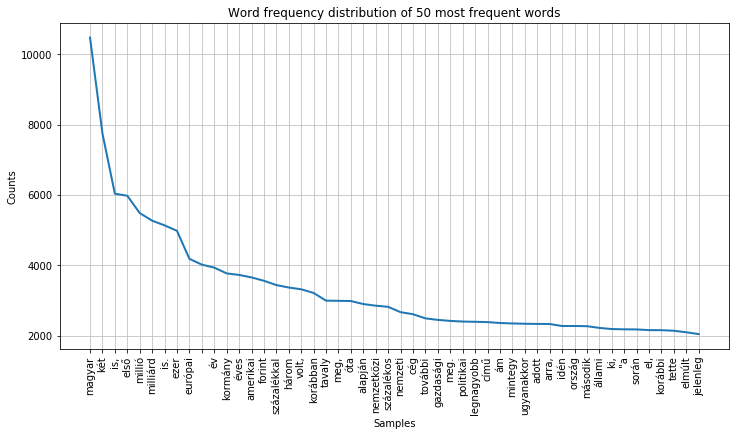

In [11]:
plt.figure(figsize=(12,6))
plt.title("Word frequency distribution of 50 most frequent words")
fdist.plot(50)

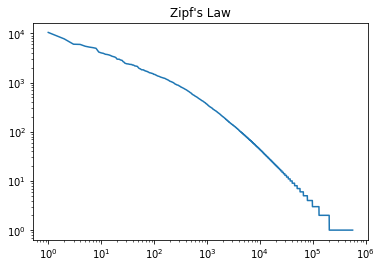

In [12]:
plt.title("Zipf's Law")
plt.plot(range(1,fdist.B()+1),sorted(fdist.values(), reverse=True))
plt.xscale('log')
plt.yscale('log')

In [13]:
print("# of unique words:", len(fdist.keys()))

# of unique words: 567335
